# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Boston housing dataset has 489 data points with 4 variables each.


/opt/conda/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [4]:
import numpy as np

# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429474


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: **

1. An increase in the `'RM'` value would likely lead to an increase in `'MEDV'`. Homes with more rooms probably are larger and have more square-footage, which usually makes them more expensive. 

2. An increase in the `'LSTAT'` value would likely lead to a decrease in `'MEDV'`. If many homeowners in the neighborhood are working poor, they likely cannot afford upkeep on their homes. This decreases the value of their homes, and home prices are negatively impacted by the value of surrounding homes. Working poor in the U.S. also cannot generally afford more expensive property, so their houses likely are of lower value. This implies that the neighborhood as a whole is comprised of less expensive homes. 

3. An increase in `'PTRATIO'` would likely lead to decrease in `'MEDV'`. Lower student to teacher ratios (i.e. 5 students to one teacher versus 10 students to one teacher) are generally associated with wealthier neighborhoods (in the U.S.) and higher property values, since local school funding is taxation based. Wealthier neighborhoods pay more in property taxes and therefore hire more teachers, lowering the student-teacher ratio. 

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [3]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:**

Yes, I would possibly consider this model to have captured some of the variation in the dependent variable based on its R2 score of 0.923. This value is very close to one, and indicates that 92.3% of the variance in the dependent variable is predictable from the independent variable. However, we still need to make sure that we carefully consider the model and validate it. 

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    features, prices, test_size = 0.20, random_state = 42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: **

Splitting the dataset into testing and training subsets can help us identify whether we have overfit or underfit our model, because we can use the two sets to validate the model. We don't know exactly what future data or new data will look like, so we save a part of our dataset as the testing set in order to see if our model was well-specified for "new" data. We use the training set to fit the model, and then we use the testing set to see if the model is a good fit (i.e., does the model predict new or future datapoints well?). In general, a model that is overfitted will fit the testing data really well, but fail to fit the training set. A model that is underfitted will not fit the testing set or the training set well. We can examine the performance of our model by comparing the fits of the testing and training sets. 

If we split the data using a very small number of datapoints for testing, we might overfit the data, since we have a lot of training data that the model can learn to fit very well, but there won't be enough testing data to check if the model is generalizable (the model will be biased towards the testing data). If we split the data and use a large testing sample, we might underfit, because our training dataset isn't large enough to capture all of the variation in the data. We can learn a lot from examining how the testing and training subsets compare as we change the size of the training set, as we do when making use of a learning curve. 

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

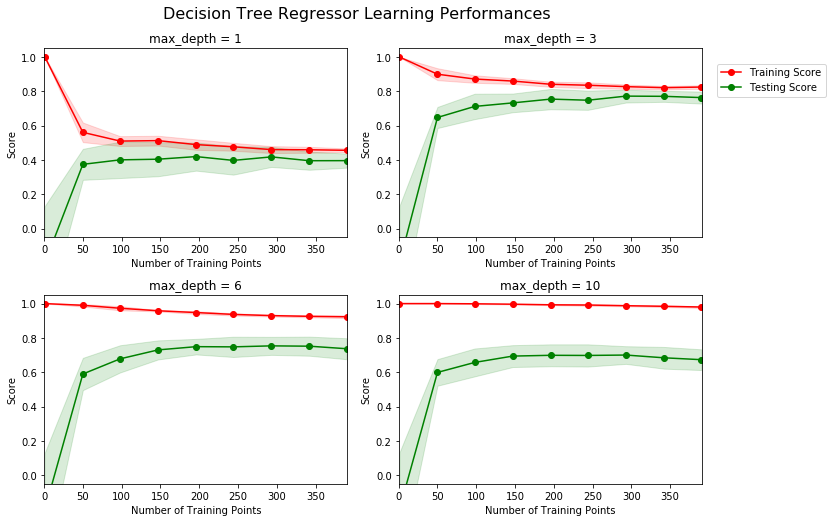

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: **

For this question I will be referring to the second graph, maximum depth = 3. 

As more training points are added, the training curve decreases slightly and then flattens. The testing curve score increases rapidly from 0-50 training points, and then also flattens. The two scores converge asymptotically after roughly 150-200 training points are added. 

Because the two curves converge rapidly, it would not benefit this model to add more training points. Both curves have reached their asymptotic limit when they converge very close to each other, and because they both converge at a high score around a good benchmark, the model seems to be well fitted. If we have too many training points, the testing set will not have enough data to test with, so we shouldn't use a larger training set than what is necessary. This could lead to overfitting. 

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

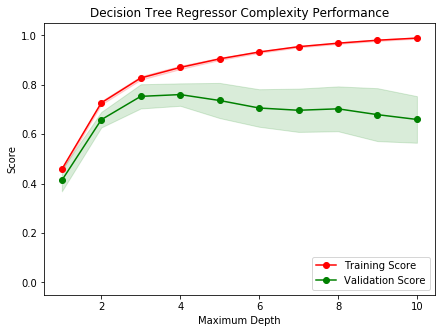

In [7]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: **

When the model is trained with a maximum depth of 1, it suffers from high bias. We can see that it is underfit, as it performs badly for the training set. It does not pick up enough nuance in the data. 


When the model is trained with a maximum depth of 10, it suffers from high variance. The testing data is well fit, but the validation score is low. When a model is overfitted, it performs very well on the training set but does not generalize well to validation or testing data. At a depth of 10, we see a low training error (high score) but a high testing error. Therefore, we can tell that this is not a good maximum depth for training the model because the training and validation scores are very far apart, and the model appears to be underfitted. 

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: **

I think a maximum depth of 3 or 4 results in the best generalizable model. At a maximum depth of 3, the testing and training set scores converge and both perform resonably well. At a maximum depth of 4, the testing and training scores are a bit further apart, but the testing set performs better and the training set only drops slightly in score, so a maximum depth of 4 might be better fit if we can sacrifice some of the accuracy in the training set. For depths larger than 4, the gap between the two scores continues to increase, and it seems that the model would be overfit. 


-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: **

Grid search is a useful way to pick the best hyperparameters for a model with more than one hyperparameter, or to examine ranges in a given single parameter to pick the best value for that parameter within a range of possible parameter values. In the case of multiple hyperparameters, we examine possible combinations of each parameter, holding it constant as the other one varies. This is like having a grid with differenct values or model types of one parameter on the x-axis, and different values/types of the other parameter on the y-axis. We use the training set to train models using each hyperparameter combination (or a range for a single parameter), then use the cross-validation set to score each individual case. This can help us optimize a learning algorithm so we know which outcomes perform best across multiple possible (hyper)parameters. 

As an example, we might be training a support vector machine and want to know what are the optimal kernel and gamma parameters to use. We look at all possible combinations of each different type of kernel and value of gamma, score each combination with the cross-validation set, and choose the combination with the best score as our final model to test with the testing set. 

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: **

With k-fold cross-validation, we split our data into k buckets. We then train the model k times, with the testing set as a different bucket evey time (the remaining k-1 buckets are used as the training set). The results of the k tests are averaged to get a final model. It is good practice to shuffle the data when forming the buckets. 

K-fold cross validation is beneficial for grid search because when we are fitting each possible different parameter combination, the scores won't be contingent on one particular subset of data. Say we have a dataset with a few really big numbers, and we perform one training/scoring test that just so happens to put all of those larges values in the testing bucket. We benefit from k-fold cross-validation in this case because we don't have to throw away or ignore a potentially important part of our data, which would happen if we only used one single testing subset (the testing outcome would be skewed away from the mean in my example).

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [8]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    ###NOTE TO GRADER: I was not sure if you want the range to be 1-10 inclusive, I assumed yes
    params = {'max_depth': range(1, 11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring = scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [9]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: **

The optimal model has a maximum depth of 4. I was not sure in question 6 whether it is better to sacrifice a small amount of score for the training set if the testing set performs almost as well as the training set and both scores are reasonably high, which is the case with a maximum depth of 3. A maximum depth of 4 fits the training set better than a depth of 3, and we don't lose too much accuracy in the testing score, although the two values diverge a small amount. 

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [10]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


**Answer: **


In order to better answer this question, I would like to see more descriptive statistics for the independent variables. My response follows the code. 

In [11]:
#descriptive stats for rooms

num_rooms = data['RM']
# Examine minimum number of rooms
minimum_rooms = num_rooms.min()

# Examine maximum number of rooms
maximum_rooms = num_rooms.max()

# Examine average number of rooms
mean_rooms = num_rooms.mean()

# Examine median number of rooms
median_rooms = num_rooms.median()

# Examine standard deviation in number of rooms 
std_rooms = prices.std()

# Show the calculated statistics
print("Minimum rooms: " + str(minimum_rooms)) 
print("Maximum rooms: " + str(maximum_rooms))
print("Mean rooms: " + str(mean_rooms))
print("Median rooms: " + str(median_rooms))
print("Standard deviation of rooms: " + str(std_rooms))

Minimum rooms: 3.561
Maximum rooms: 8.398
Mean rooms: 6.24028834356
Median rooms: 6.185
Standard deviation of rooms: 165340.277653


In [12]:
#descriptive stats for poverty levels

poverty = data['LSTAT']
# Examine minimum poverty level
minimum_poverty = poverty.min()

# Examine maximum poverty level
maximum_poverty = poverty.max()

# Examine average poverty level
mean_poverty = poverty.mean()

# Examine median poverty level
median_poverty = poverty.median()

# Examine standard deviation in poverty level 
std_poverty = poverty.std()

# Show the calculated statistics
print("Minimum poverty: " + str(minimum_poverty)) 
print("Maximum poverty: " + str(maximum_poverty))
print("Mean poverty: " + str(mean_poverty))
print("Median poverty: " + str(median_poverty))
print("Standard deviation of poverty: " + str(std_poverty))

Minimum poverty: 1.98
Maximum poverty: 37.97
Mean poverty: 12.9396319018
Median poverty: 11.69
Standard deviation of poverty: 7.08198978907


In [13]:
#descriptive stats for student-teacher ratios

teacher_ratio = data['PTRATIO']
# Examine minimum ratio
minimum_teacher_ratio = teacher_ratio.min()

# Examine maximum ratio
maximum_teacher_ratio = teacher_ratio.max()

# Examine average ratio
mean_teacher_ratio = teacher_ratio.mean()

# Examine median ratio
median_teacher_ratio = teacher_ratio.median()

# Examine standard deviation in ratio 
std_teacher_ratio = teacher_ratio.std()

# Show the calculated statistics
print("Minimum teacher ratio: " + str(minimum_teacher_ratio)) 
print("Maximum teacher ratio: " + str(maximum_teacher_ratio))
print("Mean teacher ratio: " + str(mean_teacher_ratio))
print("Median teacher ratio: " + str(median_teacher_ratio))
print("Standard deviation of teacher ratio: " + str(std_teacher_ratio))

Minimum teacher ratio: 12.6
Maximum teacher ratio: 22.0
Mean teacher ratio: 18.5165644172
Median teacher ratio: 19.1
Standard deviation of teacher ratio: 2.11126750263


**Answer to question 10, continued**

**Client 1:** the model recommends a selling price of $403,025.00, which is within one standard deviation of the mean price.

This home has a lower number of rooms than average, a higher poverty level than average, and a student-teacher ratio around average. The predicted price is slightly lower than the average home price, but this makes sense given the lower number of rooms and higher poverty levels. We have to consider the standard deviation of prices, 165,340.28 dollars. 
This is a very large amount of potential variation. Given the characteristics of this home, I would recommend setting $403,025 as an upper limit of what to expect from a potential buyer's offer. 

**Client 2:** the model recommends a selling price of $237,478.72, which is more than one standard deviation below the median price. 

This home has a lower number of rooms than average, and a higher poverty level and student-teacher ratio. The predicted price is below the average price and is also more than one standard deviation below this average price. I would recommend that Client 2 starts their asking price at the predicted price of <span>$</span>237,478.72, if this is the model we use. 

**Client 3:** the model recommends a selling price of $931,636.36, which is a much higher price than the average and median price. 

This home has a number of rooms within one standard deviation of the highest number of rooms in the dataset, a poverty level within one standard deviation of the minimum poverty level in the dataset, and a student-teacher ratio within one standard deviation of the lowest ratio in the dataset. All of these factors would intuitively suggest that the home is more valuable. Therefore I would recommend the homeowner set their asking price with a lower limit of $931,000. 

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [14]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: **

I do not think this model should be used in a real-world setting. It is not very generalizable. The predicted price range is far below the standard deviation of actual prices. 

This data has been multiplicatively scaled for inflation, but inflation is sometimes impacted by exogenous factors and may not grow at a predictable rate. Given historical inflation rates, <span>$</span>1 in 1973 is worth roughly 5.92 dollars in 2018 (See https://data.bls.gov/cgi-bin/cpicalc.pl). This is important, as predicted prices today should be higher by a rough multiple of 6, but we don't know exactly what multiplier was used to scale this particular data. It is common in economic analysis to use inflation multipliers, but these multipliers can be constants or functions themselves, depending on other variables or how old the data is. We would do better examining more recent data to avoid this problem since we don't know exactly how the multiplier was determined (or even what the multiplier is). 

More importantly, the features we are using to make predictions in this model are potentially incomplete. Factors such as the age of a home and quality of appliances/infrastructure in a home likely play an important role in the home's price, and we do not account for these characteristics in the model. If a model (or dataset) is missing important features, it is not robust enough to make consistent predictions. 

This dataset is also very specific to the city in which it was collected. Boston is one of the most expensive cities for buying a home (https://boston.curbed.com/2017/8/10/16124834/boston-home-prices-vs-other-cities), so training our model on Boston data will likely not be generalizable to smaller, less expensive cities or rural areas. 

Lastly, I believe that using neighborhood characteristics to judge a price of an individual home is useful, but could be dependent on the home in question in special cases. Intuitively, it makes sense that if one large and well-maintained home is surrounded by less expensive and less desirable ones in an impoverished area with fewer local services, potential buyers who can afford a more expensive home might want to find a neighborhood with other people in their income bracket that also provides good education and other social services. A resulting decrease in demand for the expensive, large, well-maintained home in the impoverished neighborhood would probably lead to a decrease in that home's price. We know that home value is impacted by neighborhood characteristics, so I don't think we should ignore them. For example, an increase in the number of homes in foreclosure after the 2008 recession had a negative impact on home prices for other non-forclosed properties in those neighborhoods (see https://www.sciencedirect.com/science/article/pii/S009411900900045X). However, an extremely large and well-maintained home located in a neighborhood with a high poverty level and student-teacher ratio could still be very expensive, so we could keep this in mind when examining individual cases. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.